#### Индивидуальное задание <br>
1. Увеличить толщину текста на изображении морфологическими преобразованиями
2. Улучшить видимость капчи, убрав шум морфологическими преобразованиями

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imgshow(image, conversion=cv2.COLOR_BGR2RGB):
    image = cv2.cvtColor(image, conversion)
    plt.imshow(image)
    plt.axis("off")
    plt.xticks([])
    plt.yticks([])
    plt.show()


<b> Задание 1. </b> <br> <br>
Операция эрозия позволяет увеличить темные области изображения, что подойдет для изменения толщины текста. <br>
Для этого сначала создадим ядро (kernel), а после применим функцию cv2.erode() к изображению.

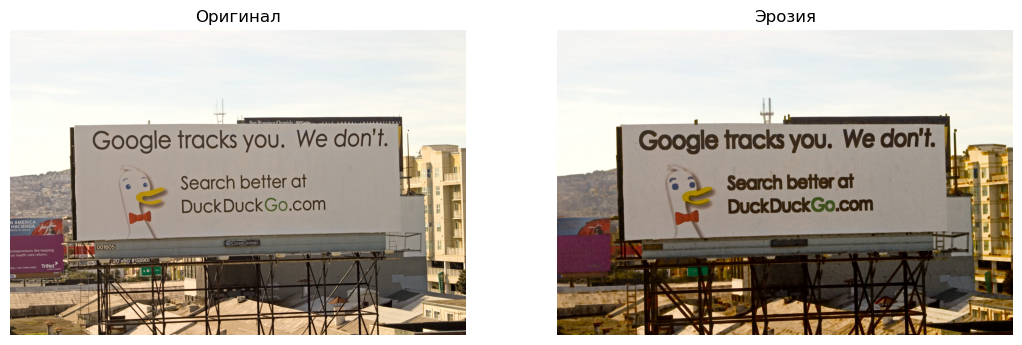

In [2]:
img = cv2.imread('pictures/1_b.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.ones((5,5), np.uint8)

erosion = cv2.erode(img, kernel,iterations = 3)

plt.figure(figsize=(20,15))

plt.subplot(131),
plt.imshow(img,cmap = 'gray'),plt.title("Оригинал"),
plt.axis('off')

plt.subplot(132),
plt.imshow(erosion,cmap = 'gray'),plt.title("Эрозия"),
plt.axis('off');

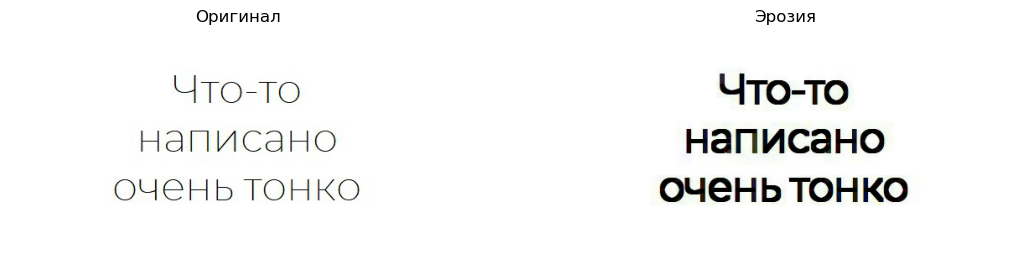

In [3]:
img2 = cv2.imread('pictures/1_something.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

erosion2 = cv2.erode(img2, kernel,iterations = 1)

plt.figure(figsize=(20,15))

plt.subplot(131),
plt.imshow(img2,cmap = 'gray'),plt.title("Оригинал"),
plt.axis('off');

plt.subplot(132),
plt.imshow(erosion2,cmap = 'gray'),plt.title("Эрозия"),
plt.axis('off');

<b> Задание 2. </b> <br> <br>
Метод открытие (комбинация операций эрозии и расширения) может помочь в удалении шума. <br>
Применим его к капче функцией cv2.morphologyEx() с параметром cv2.MORPH_CLOSE.

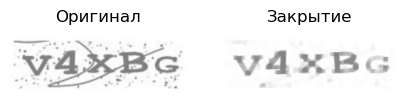

In [4]:
img = cv2.imread('pictures/captcha.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.ones((5,5),np.uint8)

close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(5,5))

plt.subplot(121)
plt.imshow(img)
plt.title("Оригинал")
plt.axis('off')

plt.subplot(122)
plt.imshow(close)
plt.title("Закрытие")
plt.axis('off')

plt.show();

Увеличим видимость, изменив гамму изображения

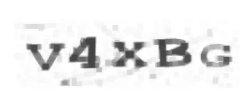

In [5]:
def make_darker(img, gamma):
    gamma_table=[np.power(x/255.0,gamma)*255.0 for x in range(256)]
    gamma_table=np.round(np.array(gamma_table)).astype(np.uint8)
    return cv2.LUT(img,gamma_table)

close = make_darker(close, 2)

plt.figure(figsize=(3,3))
plt.imshow(close)
plt.axis('off')
plt.show();